# Домашнее задание 2. Расчёт коэффициента сверхсжимаемости газа

## Введение

В пластовых условиях реальный газ отклоняется от идеального. Степень этого отклонения описывается **коэффициентом сверхсжимаемости** (Z-фактор, *compressibility factor*).

> **Z = 1** — газ ведёт себя как идеальный;  
> **Z ≠ 1** — наблюдается отклонение от идеального поведения.

Подробнее о Z-факторе можно прочитать в [Википедии](https://en.wikipedia.org/wiki/Compressibility_factor).

## Справочный документ

Расчёт выполняется по **ГОСТ 30319.2-96** — скачайте документ по [этой ссылке](https://files.stroyinf.ru/Data/187/18729.pdf). Вам понадобится **раздел 3.2.3** (модифицированное уравнение состояния GERG-91 мод., стр. 7). Проверить себя можно на стр. 48

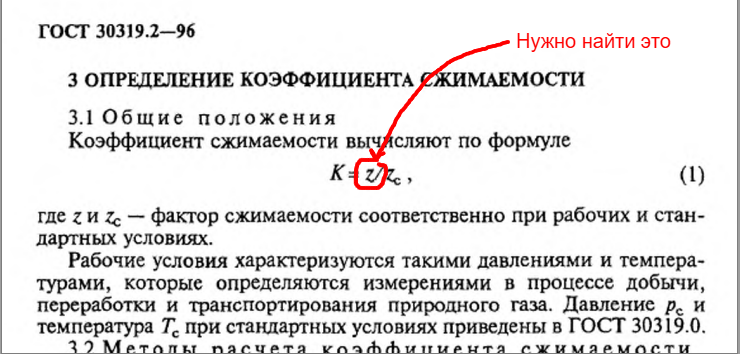

## Задание

### Что нужно сделать

1. **Реализовать метод `Fluid.get_Z(P, T)`** — расчёт коэффициента сверхсжимаемости газа по методике **GERG-91 мод.** (ГОСТ 30319.2. раздел 3.2.3. стр. 7).

2. **Реализовать метод `Fluid.get_Bg(P, T)`** — расчёт объёмного коэффициента расширения газа ([что это?](https://ru.wikipedia.org/wiki/Объёмный_фактор)):

3. **Реализовать методы `Fluid.plot_Z()` и `Fluid.plot_Bg()`** — построить графики зависимостей $Z(P)$ и $B_g(P)$ при фиксированной температуре.

4. **Загрузить свои индивидуальные данные** из файла `hw2_data.csv` (разделитель `;`), найти свою строку и использовать параметры `xa`, `xy`, `rho_c` для инициализации класса `Fluid`.

### Исходные данные

| Параметр | Описание | Единицы |
|----------|----------|---------|
| `rho_c` | Плотность газа в стандартных условиях | кг/м³ |
| `xa` | Мольная доля азота (N₂) | мол. доля |
| `xy` | Мольная доля диоксида углерода (CO₂) | мол. доля |

### Формат сдачи

- Заполненный ноутбук с рабочим кодом и построенными графиками.

> **Внимание!** Обратите внимание на единицы измерения в ГОСТе и конвертируйте при необходимости.

---

## Шаблон класса `Fluid`

Ниже приведён каркас класса. Вам нужно **дописать тела методов** `get_Z` и `get_Bg`, а также реализовать построение графиков в `plot_Z` и `plot_Bg`.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Стандартные условия
# P_std = 1 МПа, T_std = 293.15 К (20 °C)

class Fluid:
    """Класс для расчёта свойств природного газа по методике GERG-91 мод."""
    
    Pstd = 0.101325  # стандартное давление, МПа
    Tstd = 293.15  # стандартная температура, К
    
    def __init__(self, rho_c: float, xa: float, xy: float):
        """
        Параметры
        ----------
        rho_c : float
            Плотность газа в стандартных условиях, кг/м³.
        xa : float
            Мольная доля азота (N₂).
        xy : float
            Мольная доля диоксида углерода (CO₂).
        """
        self.rho_c = rho_c # кг/м3 в ст. усл
        self.xa = xa/100 # дол.ед
        self.xy = xy/100 # дол.ед
    
    def get_Z(self, P: float, T: float) -> float:
        """
        Рассчитать коэффициент сверхсжимаемости Z по методике GERG-91 мод.

        Параметры
        ----------
        P : float
            Давление, МПа.
        T : float
            Температура, K.

        Возвращает
        ----------
        float
            Коэффициент сверхсжимаемости Z.
        """
        # TODO: реализовать расчёт по ГОСТ 30319.2, раздел 3.2.3

        # Блок проверки на условия применимости
        # if not(self.rho_c > 0.668 and self.rho_c < 0.700):
        #     print(f'Attention - плотность газа в не диапазона 0.668 < ro < 0.700 кг/м3, ro:{self.rho_c}')
        # if not(T > 250 and T < 330):
        #     print(f'Attention - температура газа в не диапазона 250 < T < 340 K, K:{T}')
        # if not(P > 0 and P < 12):
        #     if P > 0 and P < 30:
        #         print(f'Attention - давление газа в не диапазона 0 < P < 12 МПа, P:{P}, погрешность расчёта +/- 3,0%')
        #     else:
        #         print(f'Attention - давление газа в не диапазона 0 < P < 30 МПа, P:{P}')

        xe = 1 - self.xa - self.xy # дол.ед, эквивалент углеводорода
        zc = 1-(0.0741*self.rho_c-0.006-0.063*self.xa-0.0575*self.xy)**2 # дол.ед, Фактор сжимаемости при стандартных условиях
        Me = (24.05525*zc*self.rho_c-28.0135*(self.xa)-44.01*(self.xy))/xe # г/моль, Молярная масса эквивалетного углеводорода
        M = Me*xe+28.0135*(self.xa)+44.01*(self.xy) # Молярная масса смеси газов
        ro_m = (self.rho_c/M) # кмоль/м3, Молярная плотность

        H = 128.64 + 47.479 * Me
        Cx = 0.92 + 0.0013 * (T - 270)
        Bx = 0.72 + 1.875*10**-5 * (320 - T)**2

        C233 = 3.58783*10**-3 + 8.06674*10**-6 * T - 3.25798*10**-8 * T**2
        C223 = 5.52066*10**-3 - 1.68609*10**-5 * T + 1.57169*10**-8 * T**2

        C3 = 2.0513*10**-3 + 3.4888*10**-5*T - 8.3703*10**-8 * T**2
        C2 = 7.8498*10**-3 - 3.9895*10**-5*T + 6.1187*10**-8 * T**2
        C1 = (-0.302488 + 1.95861*10**-3*T - 3.16302*10**-6 * T**2
              + (6.46422*10**-4 - 4.22876*10**-6*T + 6.88157*10**-9*T**2) * H
              + (-3.32805*10**-7 + 2.2316*10**-9*T - 3.67713*10**-12*T**2) * H**2)

        B3 = -0.86834 + 4.0376 * 10**-3 * T - 5.1657 * 10**-6 * T**2
        B23 = -0.339693 + 1.61176 * 10**-3 * T - 2.04429 * 10**-6 * T**2
        B2 = -0.1446 + 7.4091 * 10**-4 * T - 9.1195 * 10**-7 * T**2
        B1 = (-0.425468 + 2.865e-3 * T - 4.62073e-6 * T ** 2
               + (8.77118e-4 - 5.56281e-6 * T + 8.8151e-9 * T ** 2) * H
               + (-8.24747e-7 + 4.31436e-9 * T - 6.08319e-12 * T ** 2) * H ** 2)

        Cm = (xe**3 * C1 + 3 * xe**2 * self.xa * Cx * (C1**2 * C2)**(1/3) + 2.76 * xe**2 * self.xy * (C1**2 * C3)**(1/3)
              + 3 *xe*self.xa**2*Cx*(C1*C2**2)**(1/3) + 6.6*xe*self.xa*self.xy*(C1 * C2 * C3)**(1/3) + 2.76 * xe * self.xy**2 * (C1 * C3**2)**(1/3)
              + self.xa**3* C2 + 3 *self.xa**2 * self.xy*C223 + 3 * self.xa*self.xy**2*C233 + self.xy**3 * C3)

        Bm = (xe**2*B1 + xe*self.xa*Bx*(B1+B2)-1.73*xe*self.xy*(B1*B3)**0.5
              +self.xa**2*B2+2*self.xa*self.xy*B23+self.xy**2*B3)

        # GERG-91 mod, P в МПа
        b = 10**3 * (P / (2.7715*T))
        C0 = b**2 * Cm
        B0 = b * Bm
        A1 = 1 + B0
        A0 = 1 + 1.5 * (B0 + C0)
        A2 = (A0 - (A0**2 - A1**3)**0.5)**(1/3)

        # Z = 1 + Bm * ro_m + Cm * ro_m**2
        Z = (1 + A2 + A1/A2) / 3
        # K = round(Z/zc, 4)
        K = Z/zc
        # print(f'all     Z1: {Z1}, Z: {Z}, K: {K}', sep='\n')

        return Z
    
    def get_Bg(self, P: float, T: float) -> float:
        """
        Рассчитать объёмный коэффициент расширения газа Bg.

        Bg = (Pstd * Z * T) / (P * Tstd)

        Параметры
        ----------
        P : float
            Давление, МПа.
        T : float
            Температура, K.

        Возвращает
        ----------
        float
            Объёмный коэффициент расширения Bg.
        """
        # TODO: реализовать расчёт Bg через get_Z

        Bg = (self.Pstd * self.get_Z(P, T) * T) / ((P) * self.Tstd)

        return Bg

    def plot_Z(self, T_fixed = 310):
        """
        Построить график Z(P) при фиксированной температуре T = T_fixed К.
        Диапазон давлений: [0.1, 10] МПа.
        Ось X — давление (МПа), ось Y — Z.
        """
        # TODO: построить график

        pressure = np.linspace(0.101325, 10, 100) # МПа
        z_pl = self.get_Z(pressure, T)
        plt.plot(pressure*9.86923, z_pl)
        plt.xlabel('P, атм')
        plt.ylabel('z')
        return()

    def plot_Bg(self, T_fixed = 310):
        """
        Построить график Bg(P) при фиксированной температуре T = T_fixed К.
        Диапазон давлений: [0.1, 10] МПа.
        Ось X — давление (МПа), ось Y — Bg.
        """
        # TODO: построить график
        pressure = np.linspace(0.101325, 10, 100) # МПа
        Bg_pl = self.get_Bg(pressure, T)
        plt.plot(pressure*9.86923, Bg_pl)
        plt.xlabel('P, атм')
        plt.ylabel('Bg')


# --- Test calculate GERG-91
a = Fluid(rho_c=0.6799, xa=0.8858, xy=0.0668)
P_test = [2.001, 3.997, 7.503]; T_test = [270.0, 290.0, 330.0]; K_test = [0.9521, 0.9262, 0.9244]
for P, T, K in zip(P_test, T_test, K_test):
    print(f'Bg: {a.get_Bg(P,T)}')
    print(f'k_calc: {a.get_Z(P,T)}', f'K_gost: {K}', '---===---', sep='\n')

Bg: 0.04431911858241815
k_calc: 0.9502715455212579
K_gost: 0.9521
---===---
Bg: 0.023182758490146147
k_calc: 0.924431099265464
K_gost: 0.9262
---===---
Bg: 0.014025644743720204
k_calc: 0.9226078109871984
K_gost: 0.9244
---===---


---

## Загрузка данных и проверка

Загрузите файл `hw2_data.csv`, найдите свою строку и создайте объект `Fluid` с вашими параметрами. Затем вызовите методы для проверки.

z: 0.9273, Bg: 0.0196


np.float64(0.9981008312295219)

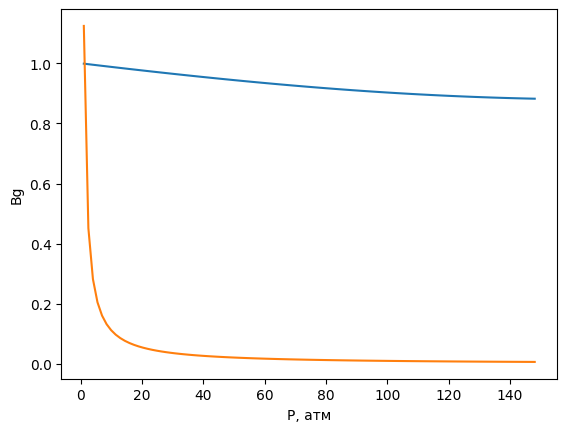

In [16]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('hw2_data.csv', sep=';', index_col=0)
xa = df.iloc[9, 1]
xy = df.iloc[9, 2]
roh = df.iloc[9, 3]
fluid = Fluid(xa=xa, xy=xy, rho_c=roh)

# Проверка: рассчитать Z и Bg при P = 50 атм, T = 310 К
P_test, T_test = 50, 310
z = fluid.get_Z(P_test * 0.101325, T_test)
bg = fluid.get_Bg(P_test * 0.101325, T_test)

print(f'z: {round(z,4)}, Bg: {round(bg,4)}')
display(fluid.get_Bg(0.101325, 293.15)) # Объёмный коэф. при стандартных условиях
# Построение графиков
fluid.plot_Z()
fluid.plot_Bg()

In [77]:

s = """Али Иван 
Альзейн Мохаммад Альжавад
Андреев Вячеслав Олегович
Гедымин Герман Константинович
Инюхин Дмитрий Романович
Котиев Муслим Магометович
Пугачев Александр Сергеевич
Пулидо Де Ла Крус Лианнес
Самохвалов Денис Александрович
Федореев Юрий Георгиевич
Хомурар Даниил Васильевич
Шабронов Алексей Сергеевич
Шайбаков Ислам Ренатович
Эрнандес Перес Луисмель
Слива Никита Владиславович
Алибаева Эмилия Ириковна
Каширин Егор Викторович"""

import numpy as np
import pandas as pd
np.random.seed(42)

data = []
for fio in s.split('\n'):
    d = {}
    xa = np.random.rand()
    xy = np.random.rand()
    d['student'] = fio
    d['xa, mol. %'] = round(xa,4)
    d['xy, mol. %'] = round(xy, 4)
    d['rho_c, kg/m3'] = 0.6799
    data.append(d)



# pd.DataFrame(data).to_csv('hw2_data.csv', sep = ';', encoding='utf-8-sig')